In [42]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import cdist, euclidean
from KMeans import KMeans
from sklearn.cluster import KMeans as SKKMeans

In [2]:
data = np.array([
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
])

data

array([[ 5,  7],
       [ 0,  6],
       [ 7,  3],
       [10,  6],
       [ 0,  3],
       [ 4,  7],
       [10,  0],
       [ 5,  3],
       [ 0,  0],
       [ 9,  2],
       [ 7,  8],
       [ 0,  2],
       [ 4,  7],
       [ 3, 10],
       [ 0,  5],
       [ 6,  2],
       [10,  5],
       [ 0,  3],
       [ 6,  5],
       [ 1,  9],
       [ 1,  6],
       [ 1,  4],
       [ 6,  3],
       [10,  7],
       [ 9,  0]])

In [26]:
x = []
y = []
for i, j in data:
    x.append(i)
    y.append(j)
    
x

[5, 0, 7, 10, 0, 4, 10, 5, 0, 9, 7, 0, 4, 3, 0, 6, 10, 0, 6, 1, 1, 1, 6, 10, 9]

In [27]:
y

[7, 6, 3, 6, 3, 7, 0, 3, 0, 2, 8, 2, 7, 10, 5, 2, 5, 3, 5, 9, 6, 4, 3, 7, 0]

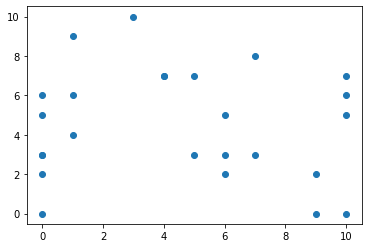

In [28]:
plt.scatter(x, y)
plt.show()

In [43]:
df = pd.DataFrame({"x" : x, "y" : y})

print(df.shape)
df

(25, 2)


,x,y
0,5,7
1,0,6
2,7,3
3,10,6
4,0,3
5,4,7
6,10,0
7,5,3
8,0,0
9,9,2


In [35]:
kmeans = KMeans(n_clusters=2, n_iter=10)
kmeans_dict = kmeans.fit(data)

kmeans_dict

{0: array([[ 5,  7],
        [ 0,  6],
        [ 0,  3],
        [ 4,  7],
        [ 5,  3],
        [ 0,  0],
        [ 7,  8],
        [ 0,  2],
        [ 4,  7],
        [ 3, 10],
        [ 0,  5],
        [ 6,  2],
        [ 0,  3],
        [ 6,  5],
        [ 1,  9],
        [ 1,  6],
        [ 1,  4],
        [ 6,  3]]), 1: array([[ 7,  3],
        [10,  6],
        [10,  0],
        [ 9,  2],
        [10,  5],
        [10,  7],
        [ 9,  0]])}

In [40]:
print(np.array(kmeans.clusters))

[0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]


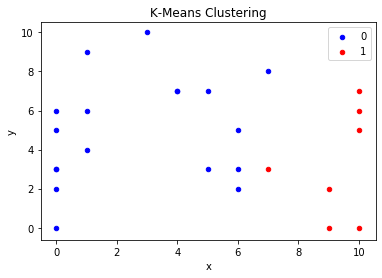

In [44]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering')

grouped = df.groupby(np.array(kmeans.clusters))
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

In [39]:
skkmeans = SKKMeans(n_clusters=2)
skkmeans = skkmeans.fit(data)

print(skkmeans.labels_)

[1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0]


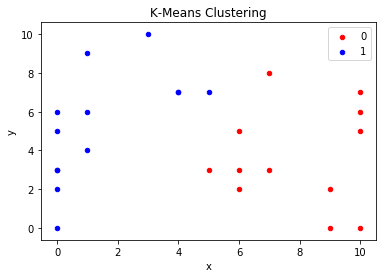

In [47]:
colors = {1 : 'blue', 0 : 'red'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering')

grouped = df.groupby(skkmeans.labels_)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()